# What are the effects of each variable on thermal evolution?
<a class="anchor" id="top"></a>
<p align="right">
Variables are:
+ $\phi_{rcmf}$ - rheologically critical melt fraction [0.2,0.5] - params_1
+ $\eta_0$ - reference viscsoity [1e10,1e25]Pas - params_2
+ frht - Arrhenius slope of the viscosity law [0.005,0.08]$K^{-1}$ - params_3
+ $\eta_l$ - liquid viscosity [10,1000]Pas -params_4
+ $X_{S,0}$ - initial core sulfur content [28,32]wt% - params_5
+ $^{60}Fe/^{56}Fe$ - radiogenic iron fraction in accreting material [0,1e-7] - params_6
+ $\alpha_n$ - diffusion vs dislocation creep [25,30] - params_7
+ radius [100,400]km - params_8

For each variable there are two [temperature-time](#Tt) and [flux-time](#Ft) plots for the two endmembers.
Across all values, there are plots for:
+ [peak core and mantle temperatures](#peakT)
+ [Rem, B and compositional flux](#BRem-p) 
+ [Rem, B and core solidification](#BRem-solid) 
+ [Inner core size](#f)
+ [timings](#time) all thermal history timings
    + [filled](#time-filled)
+ [Dynamo timings](#dynamo)
+ [Solidification time](#solid)
+ [Lid thickness](#lid)

# Set-up
This can be run once for a specific variable

## Import libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import seaborn as sns

Colours for plotting (there are a lot as there are a lot of values of $\eta_0$)

In [2]:
colors = ['black','darkblue','blue','royalblue','cornflowerblue','paleturquoise','salmon','maroon','saddlebrown','chocolate','orange','tan','olive','olivedrab','yellowgreen','darkolivegreen']

## Import data

In [3]:
folder = 'Paper_run4/'
subfolders = {'rcmf':1,'eta0':2,'beta':3,'etal':4,'Xs_0':5,'Fe0':6,'alpha_n':7,'r':8}
labels = {'rcmf':'$\\phi_{{RCMF}}$','eta0':'$\\eta_0$','beta':'$\\beta$','etal':'$\\eta_l$ ','Xs_0':'$X_{{s,0}}$','Fe0':'$^{{60}}Fe/^{{56}}Fe$','alpha_n':'$\\alpha_n$','r':'radius'}
Myr = 365*24*3600*1e6 #number of s in Myr

Choose your variable of interest

In [4]:
var = 'Xs_0'
unit = '' #unit of variable
varlab = labels[var]
logvar = False
save = False
path = '../Results_combined/'+folder+f"params_{subfolders[var]}/"

Import the temperature profile data for the two endmembers

In [5]:
#find run numbers
var_data = pd.read_csv(path+'auto_params.csv',skiprows=[1])
#var_results = pd.read_csv(path+'run_results.csv',skiprows=[1])
var_results = pd.read_csv(f'../Results_combined/{folder}/all_sucess_info.csv',skiprows=[1])
#data = pd.merge(var_data,var_results,on='run')
minrun = min(var_data['run'])
maxrun = max(var_data['run'])
nrun = len(var_data)
data = var_results[(var_results['run']>=minrun)&(var_results['run']<=maxrun)].copy(deep=True)
data.reset_index(inplace=True,drop=True)

Find min and max var values for labelling

In [6]:
var1=var_data.loc[var_data['run']==minrun,var].values[0]
var2=var_data.loc[var_data['run']==maxrun,var].values[0]

## Import lowest endmember

In [7]:
#End member 1
run = int(minrun)
npzfile = np.load(f'{path}run_{run}_diff.npz')
Tdiff = npzfile['Tdiff'] 
tdiff = npzfile['t_diff']/Myr
d0_diff = npzfile['d0']

npzfile = np.load(f'{path}run_{run}.npz')
T_profile = npzfile['T_profile']
t1 = npzfile['t']/Myr #time in Myr
d01 = npzfile['d0'] 
dl1 = npzfile['dl']
f1 = npzfile['f']
min_unstable = npzfile['min_unstable'] 
Flux = npzfile['Flux']
Fs1 = Flux[0]
Fcmb1 = Flux[1]
Fad1 = Flux[2]
Frad1 = Flux[3]

#time for field to be on
on11=var_results.loc[var_results['run']==minrun,'magon_1'].values[0]
off11=var_results.loc[var_results['run']==minrun,'magoff_1'].values[0]
on12=var_results.loc[var_results['run']==minrun,'magon_2'].values[0]
off12=var_results.loc[var_results['run']==minrun,'magoff_2'].values[0]
on13=var_results.loc[var_results['run']==minrun,'magon_3'].values[0]
off13=var_results.loc[var_results['run']==minrun,'magoff_3'].values[0]

#get time for switch to conduction
fcond_t1 = var_results.loc[var_results['run']==run,'fcond_t'].values[0]
#Concatenate
Tall_1 = np.hstack((Tdiff,np.transpose(T_profile)))
tall_1 = np.append(tdiff,t1)
d0_all_1 = np.append(d0_diff,d01)
dr = var_data.loc[var_data['run']==run,'dr'].values[0]
r1 = var_data.loc[var_data['run']==run,'r'].values[0]
rplot_1 = np.arange(0,r1+dr,dr)/1e3

In [8]:
#find unstable indices for plotting core stratification
r_unstable1=np.array([]) 
for ind in min_unstable:
    r_unstable1 = np.append(r_unstable1,rplot_1[int(ind)])
rc1 = r1/2

## Import highest endmember

In [9]:
#End member 2
run = int(maxrun)
npzfile = np.load(f'{path}run_{run}_diff.npz')
Tdiff = npzfile['Tdiff'] 
tdiff = npzfile['t_diff']/Myr
d0_diff = npzfile['d0']

npzfile = np.load(f'{path}run_{run}.npz')
T_profile = npzfile['T_profile']
t2 = npzfile['t']/Myr #time in Myr 
d02 = npzfile['d0'] 
dl2 = npzfile['dl']
f2 = npzfile['f']
min_unstable = npzfile['min_unstable'] 
Flux = npzfile['Flux']
Fs2 = Flux[0]
Fcmb2 = Flux[1]
Fad2 = Flux[2]
Frad2 = Flux[3]

#time for field to be on
on21=var_results.loc[var_results['run']==maxrun,'magon_1'].values[0]
off21=var_results.loc[var_results['run']==maxrun,'magoff_1'].values[0]
on22=var_results.loc[var_results['run']==maxrun,'magon_2'].values[0]
off22=var_results.loc[var_results['run']==maxrun,'magoff_2'].values[0]
on23=var_results.loc[var_results['run']==maxrun,'magon_3'].values[0]
off23=var_results.loc[var_results['run']==maxrun,'magoff_3'].values[0]
#get time for switch to conduction
fcond_t2 = var_results.loc[var_results['run']==run,'fcond_t'].values[0]

#Concatenate
Tall_2 = np.hstack((Tdiff,np.transpose(T_profile)))
tall_2 = np.append(tdiff,t2)
d0_all_2 = np.append(d0_diff,d02)
dr = var_data.loc[var_data['run']==run,'dr'].values[0]
r2 = var_data.loc[var_data['run']==run,'r'].values[0]
rplot_2 = np.arange(0,r2+dr,dr)/1e3

In [10]:
#find unstable indices for plotting core stratification
r_unstable2=np.array([]) 
for ind in min_unstable:
    r_unstable2 = np.append(r_unstable2,rplot_2[int(ind)])
rc2 = r2/2

## Temperature profiles <a class="anchor" id="Tt"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

In [11]:
tend = max(np.max(t1),np.max(t2)) #upper limit for time axes

In [ ]:
plt.figure(figsize=[20,15])
#subplot 1 - min value
plt.subplot(2,1,1)
plt.pcolormesh(tall_1[::2],rplot_1[::2],Tall_1[::2,::2],shading = 'gouraud',vmin=200,vmax=1600)
plt.hlines(rc1/1e3,min(t1),max(tall_1),linestyle='--',color='black',label='CMB')
plt.vlines(t1[0],0,r1/1e3,linestyle='-.',label='Differentiation')
plt.fill_betweenx([0,rc1/5e3],on11,off11,alpha=0,hatch='/',label='dynamo on')
plt.vlines(t1[f1<0.999000][0]/Myr,0/1e3,rc1/1e3,linestyle='dotted',label='beginning of core solidification',color='black')
plt.plot(t1,r_unstable1,linestyle='dotted',label='Convecting core')
if on12>0:
    plt.fill_betweenx([0,rc1/5e3],on12,off12,alpha=0,hatch='/')
if on13>0:
    plt.fill_betweenx([0,rc1/5e3],on13,off13,alpha=0,hatch='/')
if np.any(t1/Myr<fcond_t1):
    plt.plot(t1[(t1<=fcond_t1)&(d01<(r1-rc1))],(r1-d01[(t1<=fcond_t1)&(d01<(r1-rc1))])/1e3,linestyle='dashed',label='base of $\delta_0$',color='blue')
    plt.plot(t1[(t1<=fcond_t1)&((rc1+dl1)<r1)],(rc1+dl1[(t1<=fcond_t1)&((rc1+dl1)<r1)])/1e3,linestyle='dotted',label='top of $\delta_l$',color='blue')
    plt.vlines(t1[t1<=fcond_t1][-1],r1/1e3,rc1/1e3,linestyle='dotted',label='conductive mantle',color='red')
else:
    plt.plot(t1,(r1-d01)/1e3,linestyle='dashed',label='base of $\delta_0$',color='blue')
    plt.plot(t1,(rc1+dl1)/1e3,linestyle='dotted',label='top of $\delta_l$',color='blue')
#labels and limits
plt.ylabel('r /km')
plt.xlabel('t / Myr')
plt.xlim([0.8,tend])
plt.colorbar(label='T/K')
plt.title(f"{varlab}={var1:.0e} {unit}")
plt.xscale('log')
plt.legend(bbox_to_anchor=[1.4,0.5])

#subplot 2 - max value
plt.subplot(2,1,2)
plt.pcolormesh(tall_2[::2],rplot_2[::2],Tall_2[::2,::2],shading = 'gouraud',vmin=200,vmax=1600)
plt.hlines(rc2/1e3,min(t2),max(tall_2),linestyle='--',color='black',label='CMB')
plt.vlines(t2[0],0,r2/1e3,linestyle='-.',label='Differentiation')
plt.vlines(t2[f2<0.999000][0]/Myr,0/1e3,rc2/1e3,linestyle='dotted',label='beginning of core solidification',color='black')
plt.plot(t2,r_unstable2,linestyle='dotted',label='Convecting core')
plt.fill_betweenx([0,rc2/5e3],on21,off21,alpha=0,hatch='/',label='dynamo on')
if on22>0:
    plt.fill_betweenx([0,rc2/5e3],on22,off22,alpha=0,hatch='/')
if on23>0:
    plt.fill_betweenx([0,rc2/5e3],on23,off23,alpha=0,hatch='/')
if np.any(t2/Myr<fcond_t2):
    plt.plot(t2[(t2<=fcond_t2)&(d02<(r2-rc2))],(r2-d02[(t2<=fcond_t2)&(d02<(r2-rc2))])/1e3,linestyle='dashed',label='base of $\delta_0$',color='blue')
    plt.plot(t2[(t2<=fcond_t2)&((rc2+dl2)<r2)],(rc2+dl2[(t2<=fcond_t2)&((rc2+dl2)<r2)])/1e3,linestyle='dotted',label='top of $\delta_l$',color='blue')
    plt.vlines(t2[t2<=fcond_t2][-1],r2/1e3,rc2/1e3,linestyle='dotted',label='conductive mantle',color='red')
else:
    plt.plot(t2,(r2-d02)/1e3,linestyle='dashed',label='base of $\delta_0$',color='blue')
    plt.plot(t2,(rc2+dl2)/1e3,linestyle='dotted',label='top of $\delta_l$',color='blue')
#labels and limits
plt.ylabel('r /km')
plt.xlabel('t / Myr')
plt.xlim([0.8,tend])
plt.colorbar(label='T/K')
plt.title(f"{varlab}={var2} {unit}")
plt.xscale('log')
plt.legend(bbox_to_anchor=[1.4,0.5])
if save == True:
    plt.savefig(f'../Plots/{folder}/Tprofile_{var}.png',bbox_inches='tight')

Just the second variable

### Peak core and mantle temperature <a class="anchor" id="peakT"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

In [12]:
#find upper and lower bounds for time colour maps
combt = np.concatenate([data['tmax'],data['tcoremax']])
tmin = min(combt)
tmax = max(combt)

In [127]:
if var == 'Fe0':
    cmap = plt.colormaps['viridis']
    bounds = [-0.5e-8,0.5e-8,0.5e-7,1.5e-7,1e-6]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    fig = plt.figure()
    plt.scatter(data['tmax'],data['peakT'],label='Peak mantle temperature',marker='o',c=data[var],cmap=cmap,norm=norm)
    plt.scatter(data['tcoremax'],data['peak_coreT'],label='Peak core temperature',marker='v',c=data[var],cmap=cmap,norm=norm)
    plt.xlabel(f'Time /Myr')
    plt.legend()
    plt.ylabel('Temperature /K')
    fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm),ticks=[0,1e-8,1e-7,6e-7],spacing='uniform',orientation='vertical',label='$^{60}Fe/^{56}Fe$')
    if save == True:
        plt.savefig(f'../Plots/{folder}/peakTt_{var}.png',bbox_inches='tight')            

In [128]:
if var == 'Fe0':
    fig = plt.figure()
    plt.scatter(data[var],data['peakT'],label='Peak mantle temperature',marker='o',c=data['tmax'],vmin=tmin,vmax=tmax)
    plt.scatter(data[var],data['peak_coreT'],label='Peak core temperature',marker='v',c=data['tcoremax'],vmin=tmin,vmax=tmax)
    plt.xlabel(varlab)
    plt.legend()
    plt.ylabel(varlab)
    plt.colorbar(label='Time/Myr')
    if save == True:
        plt.savefig(f'../Plots/{folder}/peakTFe_{var}.png',bbox_inches='tight')         

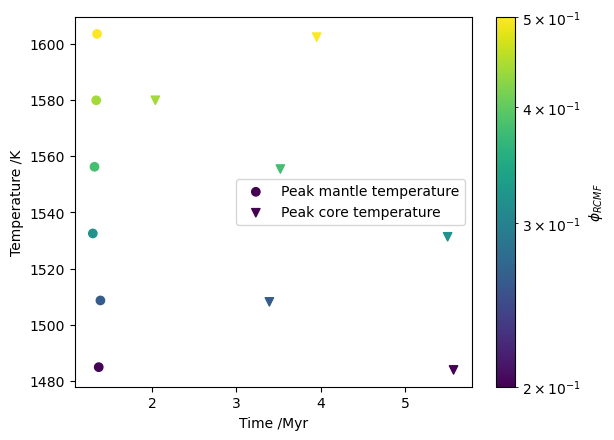

In [13]:
if var!='Fe0':
    plt.figure()
    plt.scatter(data['tmax'],data['peakT'],label='Peak mantle temperature',marker='o',c=data[var],norm=mpl.colors.LogNorm())
    plt.scatter(data['tcoremax'],data['peak_coreT'],label='Peak core temperature',marker='v',c=data[var],norm=mpl.colors.LogNorm())
    plt.xlabel('Time /Myr')
    plt.legend()
    plt.ylabel('Temperature /K')
    plt.colorbar(label=f'{varlab}{unit}')

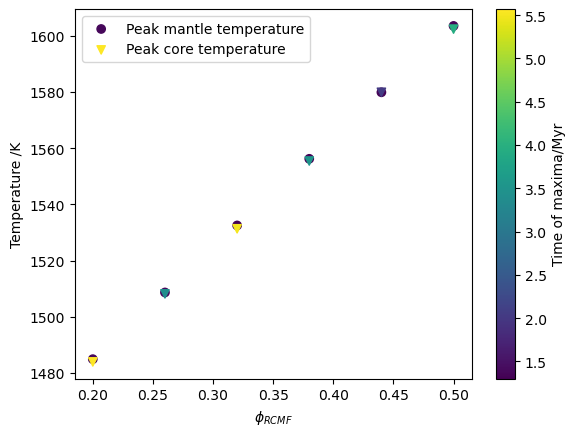

In [15]:
if var!='Fe0':
    plt.figure()
    plt.scatter(data[var],data['peakT'],label='Peak mantle temperature',marker='o',c=data['tmax'],vmin=tmin,vmax=tmax)
    plt.scatter(data[var],data['peak_coreT'],label='Peak core temperature',marker='v',c=data['tcoremax'],vmin=tmin,vmax=tmax)
    plt.xlabel(f'{varlab} {unit}')
    plt.legend()
    plt.ylabel('Temperature /K')
    plt.colorbar(label='Time of maxima/Myr')
    if logvar == True:
        plt.xscale('log')
    if save == True:
        plt.savefig(f'../Plots/{folder}/peakT_{var}.png')

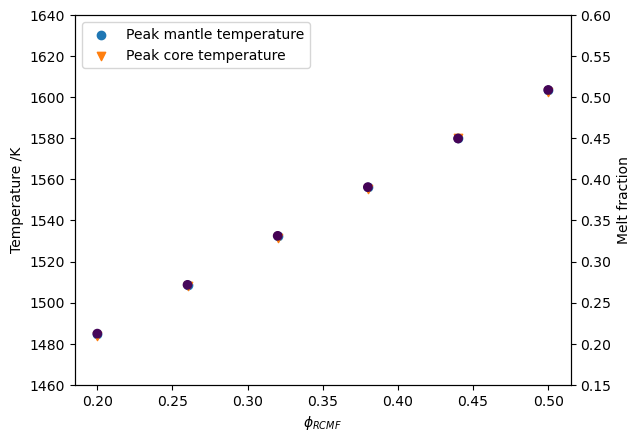

In [16]:
if var=='rcmf':
    phi = (data['peakT']-1400)/400
    fig, ax1 = plt.subplots(nrows=1,ncols=1,sharex=True)
    ax1.scatter(data[var],data['peakT'],label='Peak mantle temperature',marker='o')
    ax1.scatter(data[var],data['peak_coreT'],label='Peak core temperature',marker='v')
    ax2 = ax1.twinx()
    ax2.scatter(data[var],phi,marker='o',c=data['tmax'],vmin=tmin,vmax=tmax)
    ax1.set_xlabel(varlab)
    ax1.legend(loc='upper left')
    ax1.set_ylabel('Temperature /K')
    ax2.set_ylabel('Melt fraction')
    ax2.set_ylim([0.15,0.6])
    ax1.set_ylim([0.15*400+1400,0.6*400+1400])
    #plt.xscale('log')
    if save == True:
        plt.savefig(f'../Plots/{folder}/peakT_{var}.png')

Difference in peak temperatures

In [131]:
data['peak_coreT']-data['peakT']

0   -0.260530
1   -0.420618
2   -0.623297
dtype: float64

Difference in timing of peak temperatures

In [132]:
data['tcoremax']-data['tmax']

0    1.79983
1    1.89982
2    1.89982
dtype: float64

# Flux-time <a class="anchor" id="Ft"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

### Two endmembers

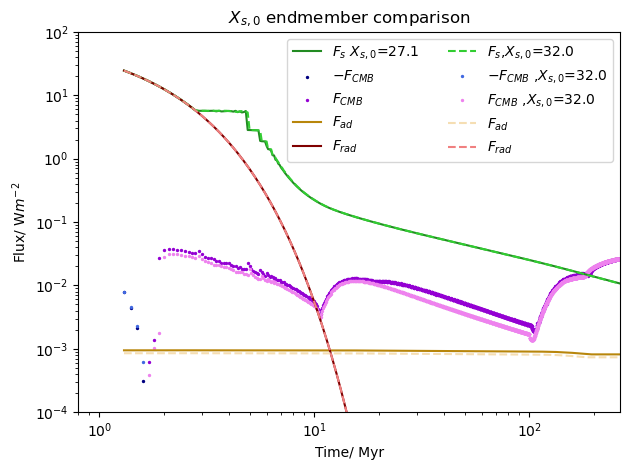

In [12]:
plt.figure(tight_layout=True)
#end member 1
plt.plot(t1,Fs1,label=f'$F_s$ {varlab}={var1} {unit}',color='forestgreen')
plt.scatter(t1[Fcmb1<0],abs(Fcmb1[Fcmb1<0]),label='$-F_{CMB}$',color='navy',s=2)
plt.scatter(t1[Fcmb1>0],Fcmb1[Fcmb1>0],label='$F_{CMB}$',color='darkviolet',s=2)
plt.plot(t1,Fad1,label='$F_{ad}$',color='darkgoldenrod')
plt.plot(t1,Frad1,label='$F_{rad}$',color='maroon')

#end member 2
plt.plot(t2,Fs2,label=f"$F_s$,{varlab}={var2} {unit}",linestyle='dashed',color='limegreen')
plt.scatter(t2[Fcmb2<0],abs(Fcmb2[Fcmb2<0]),label=f'$-F_{{CMB}}$ ,{varlab}={var2}',color='royalblue',s=2)
plt.scatter(t2[Fcmb2>0],Fcmb2[Fcmb2>0],label=f'$F_{{CMB}}$ ,{varlab}={var2}',color='violet',s=2)
plt.plot(t2,Fad2,linestyle='dashed',color='wheat',label='$F_{ad}$')
plt.plot(t2,Frad2,linestyle='dashed',color='lightcoral',label='$F_{rad}$')
plt.xlabel('Time/ Myr')
plt.xlim([0.8,tend])
plt.xscale('log')
plt.yscale('log')
plt.ylim([1e-4,1e2])   #use these limits when comparing runs
plt.ylabel('Flux/ W$m^{-2}$')
plt.legend(loc='upper right',ncol=2)
plt.title(f'{varlab} endmember comparison')
if save == True:
    plt.savefig(f'../Plots/{folder}Tflux_endcomp{var}.png',dpi=450)


# Rem and core size <a class="anchor" id="Rt"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

### B, Rem and compositional/thermal buoyancy flux <a class="anchor" id="BRem-p"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

32.441330654238776
34.83270225686201
0.6197649393555027
0.0
0.6269644649113674


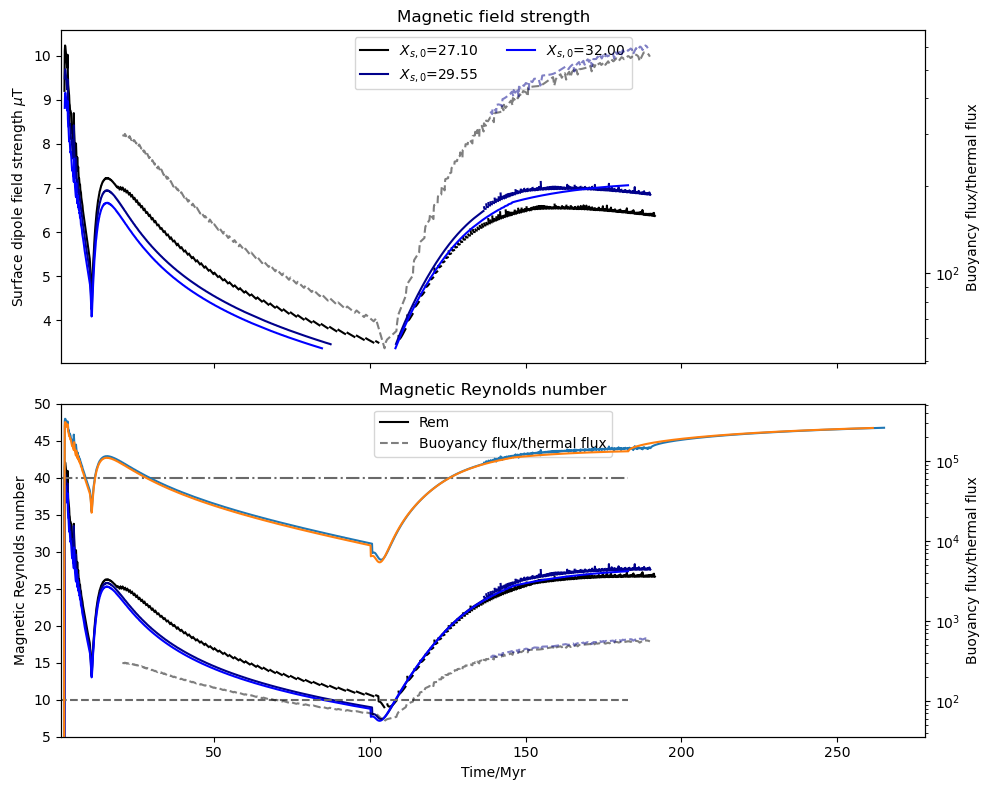

In [49]:
fig, ax = plt.subplots(nrows=2,ncols=1,sharex='col',tight_layout=True,figsize=[10,8])
ax2 = ax[0].twinx()
ax3 = ax[1].twinx()

for i in range(nrun):
    run = int(minrun+i)
    varval = var_data.loc[var_data['run']==run,var].values[0]
    if var=='r':
        varval = varval/1e3
    #import data
    npzfile = np.load(f'{path}run_{run}.npz')
    tplot = npzfile['t']/Myr
    B = npzfile['B']/1e-6
    Rem = npzfile['Rem']
    Fcmb = npzfile['Flux'][1]
    Fad = npzfile['Flux'][2]
    buoy = npzfile['buoyr'] #ratio of compositional/thermal flux
    threshold=10
    size=2.5 #size of points on scatter plot
    print(np.average(buoy[tplot>150]))
    #B plot
    if var =='eta0':
        ax[0].plot(tplot,np.ma.masked_where(Rem<threshold,B),color=colors[i],label=f'{varlab}={varval:.1e} {unit}')
    else:
        ax[0].plot(tplot,np.ma.masked_where(Rem<threshold,B),color=colors[i],label=f'{varlab}={varval:.2f} {unit}')
    ax2.plot(tplot[buoy>0],buoy[buoy>0],color=colors[i],alpha=0.5,linestyle='dashed')
    
    #Rem plot
    if i == 0:   
        ln1 = ax[1].plot(tplot,np.ma.masked_where(Rem<=0,Rem),color=colors[i],label='Rem')
        ln2 = ax3.plot(tplot[buoy>0],buoy[buoy>0],color=colors[i],linestyle='dashed',alpha=0.5, label='Buoyancy/thermal flux')
    else:
        ax[1].plot(tplot,np.ma.masked_where(Rem<=0,Rem),color=colors[i])
        ax3.plot(tplot[buoy>0],buoy[buoy>0],color=colors[i],linestyle='dashed',alpha=0.5)
        ax3.plot(tplot,(Fcmb-Fad)*1e7)
        print(((Fcmb-Fad)*1e7)[tplot<25][-1]/((Fcmb-Fad)*1e7)[tplot>150][0])
ax[1].hlines(10,xmin=0,xmax=tplot[Rem>0][-1],color='dimgray',linestyle='--')
ax[1].hlines(40,xmin=0,xmax=tplot[Rem>0][-1],color='dimgray',linestyle='-.')
ax[1].hlines(100,xmin=0,xmax=tplot[Rem>0][-1],color='dimgray',linestyle='dotted')

ax[0].set_ylabel('Surface dipole field strength $\\mu$T')
ax[1].set_ylabel('Magnetic Reynolds number')
ax2.set_ylabel('Buoyancy flux/thermal flux')
ax3.set_ylabel('Buoyancy flux/thermal flux')

ax[1].set_xlabel('Time/Myr')
ax[0].legend(ncols=2,loc='upper center')
ax[1].legend(ln1+ln2,['Rem','Buoyancy flux/thermal flux'],loc='upper center')
#ax[0].set_xscale('log')
#ax[1].set_xscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax[0].set_title('Magnetic field strength')
ax[1].set_title('Magnetic Reynolds number')
ax[1].set_xlim(left=0.8)
ax[1].set_ylim([5,50])
#ax[1].set_xlim([100,110])
if save==True:
    plt.savefig(f'../Plots/{folder}BRem_buoy_{var}.png',dpi=450,bbox_inches='tight')

### B and Rem with onset of solidification <a class="anchor" id="BRem-solid"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

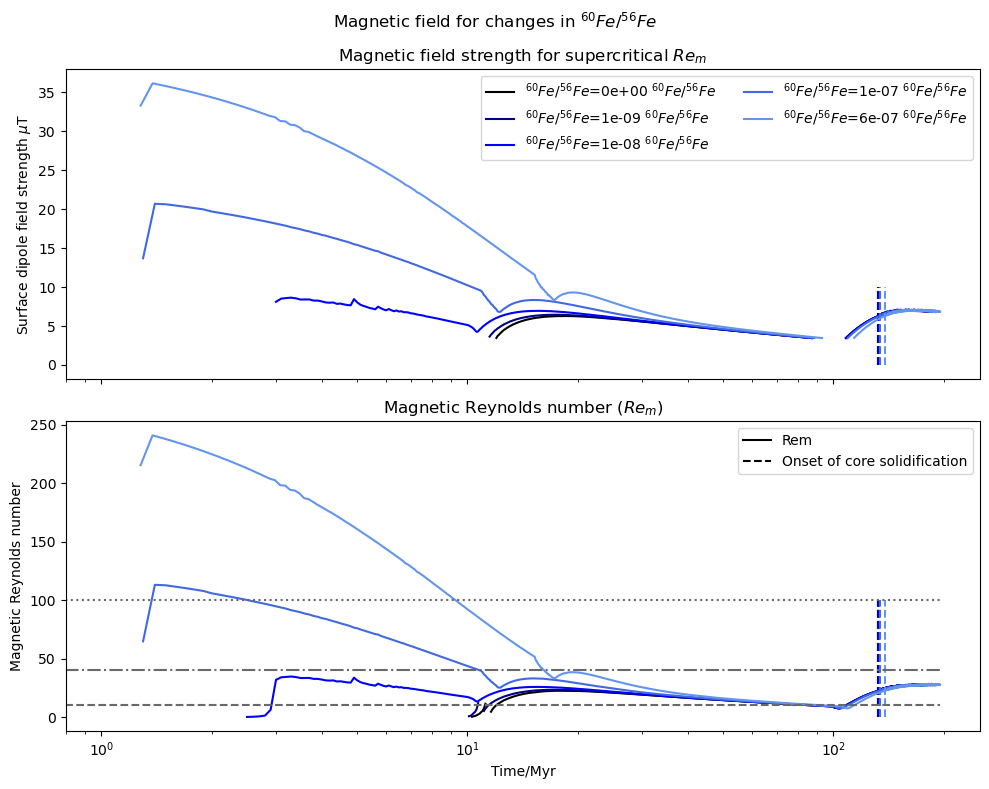

In [189]:
fig, ax = plt.subplots(nrows=2,ncols=1,sharex='col',tight_layout=True,figsize=[10,8])
fig.suptitle(f'Magnetic field for changes in {varlab}')

for i in range(nrun):
    run = int(minrun+i)
    varval = var_data.loc[var_data['run']==run,var].values[0]
    tsolid = var_results.loc[var_results['run']==run,'tsolid_start'].values[0]
    if var=='r':
        varval = varval/1e3
    #import data
    npzfile = np.load(f'{path}run_{run}.npz')
    tplot = npzfile['t']/Myr
    B = npzfile['B']/1e-6
    Rem = npzfile['Rem']
    buoy = npzfile['buoyr'] #ratio of compositional/thermal flux
    threshold=10
    
    #B plot - adjust units labels here
    ax[0].plot(tplot,np.ma.masked_where(Rem<threshold,B),color=colors[i],label=f'{varlab}={varval:.0e} {unit}')
    ax[0].vlines(tsolid,0,10,color=colors[i],linestyle='dashed')
    
    #Rem plot
    if i == 0:   
        ax[1].plot(tplot,np.ma.masked_where(Rem<=0,Rem),color=colors[i],label='Rem')
        ax[1].vlines(tsolid,0,100,color=colors[i],linestyle='dashed',label='Onset of core solidification')
    else:
        ax[1].plot(tplot,np.ma.masked_where(Rem<=0,Rem),color=colors[i])
        ax[1].vlines(tsolid,0,100,color=colors[i],linestyle='dashed')
    
ax[1].hlines(10,xmin=0,xmax=tplot[Rem>0][-1],color='dimgray',linestyle='--')
ax[1].hlines(40,xmin=0,xmax=tplot[Rem>0][-1],color='dimgray',linestyle='-.')
ax[1].hlines(100,xmin=0,xmax=tplot[Rem>0][-1],color='dimgray',linestyle='dotted')

ax[0].set_ylabel('Surface dipole field strength $\\mu$T')
ax[1].set_ylabel('Magnetic Reynolds number')

ax[1].set_xlabel('Time/Myr')
ax[0].legend(ncols=2,loc='upper right')
ax[1].legend(loc='upper right')
ax[0].set_title('Magnetic field strength for supercritical $Re_m$')
ax[1].set_title('Magnetic Reynolds number ($Re_m$)')
ax[1].set_xscale('log')
ax[1].set_xlim(left=0.8)
if save == True:
    plt.savefig(f'../Plots/{folder}BRem_onset_{var}.png',dpi=450,bbox_inches='tight')

### Simplified version for talk

In [100]:
colors = ['darkblue','royalblue','cornflowerblue','paleturquoise']

### Inner core size <a class="anchor" id="f"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

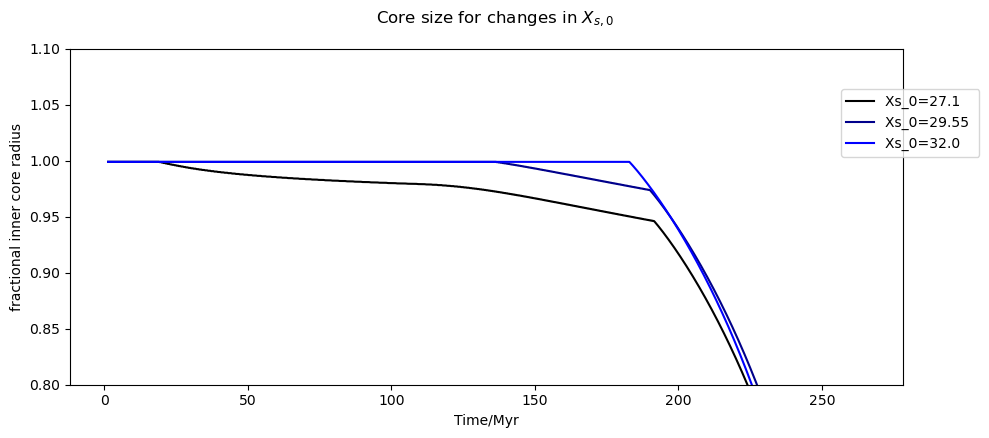

In [39]:
plt.figure(tight_layout=True,figsize=[10,8])
plt.suptitle(f'Core size for changes in {varlab}')
plt.subplot(2,1,1)
for i in range(nrun):
    run = int(minrun+i)
    varval = var_data.loc[var_data['run']==run,var].values[0]
    if var=='r':
        varval = varval/1e3
    #import data
    npzfile = np.load(f'{path}run_{run}.npz')
    t = npzfile['t']/Myr #time in Myr
    f = npzfile['f']
    plt.plot(t,f,label=f'{var}={varval} {unit}',color=colors[i])
plt.xlabel('Time/Myr')
plt.ylabel('fractional inner core radius')
plt.legend(bbox_to_anchor=[1.1,0.9])
#plt.xscale('log')
plt.ylim([0.8,1.1])
if save == True:
    plt.savefig(f'../Plots/{folder}f_{var}.png',dpi=450,bbox_inches='tight')

# Timings <a class="anchor" id="time"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

### Points only

In [ ]:
with sns.plotting_context('talk'):
    plt.figure(figsize=[20,7.5])
    plt.title(f'Variation in thermal history and dynamo timings \n as a function of {varlab}')
    plt.scatter(data['diff_time'],data[var],label='differentiation',marker='s',color='darkred')
    plt.scatter(data['tmax'],data[var],label='peak mantle temp',marker='+',color='firebrick')
    plt.scatter(data['tcoremax'],data[var],label='peak core temp',marker='x',color='rosybrown')
    plt.scatter(data['tstrat_remove'],data[var],label='erosion of core stratification',marker='o',color='indianred')
    plt.scatter(data['terode'],data[var],label='core stratification removed',marker='p',color='lightcoral')
    plt.scatter(data['magon_1'],data[var],label='first dynamo start',marker='<',color='darkblue')
    plt.scatter(data['magoff_1'],data[var],label='first dynamo end',marker='>',color='darkblue')
    plt.scatter(data['fcond_t'],data[var],label='end of mantle convection',marker='*',color='palevioletred')
    plt.scatter(data['magon_2'],data[var],label='second dynamo start',marker='^',color='skyblue')
    plt.scatter(data['magoff_2'],data[var],label='second dynamo end',marker='v',color='skyblue')
    plt.scatter(data['tsolid'],data[var],label='core solidified',marker='d',color='pink')
    plt.xlabel('Time/Myr')
    plt.xscale('log')
    if logvar == True:
        plt.yscale('log')
    plt.ylabel(varlab)
    plt.legend(ncols=2,bbox_to_anchor=(1,0.9))
#if save == True:
    #plt.savefig(f'../Plots/{folder}all_timings_{var}.png',dpi=450,bbox_inches='tight')  

### Filled <a class="anchor" id="time-filled"></a>
<p align="right">(<a href="#top">back to top</a>)</p>
The points here need removing eventually and the labels need moving around.

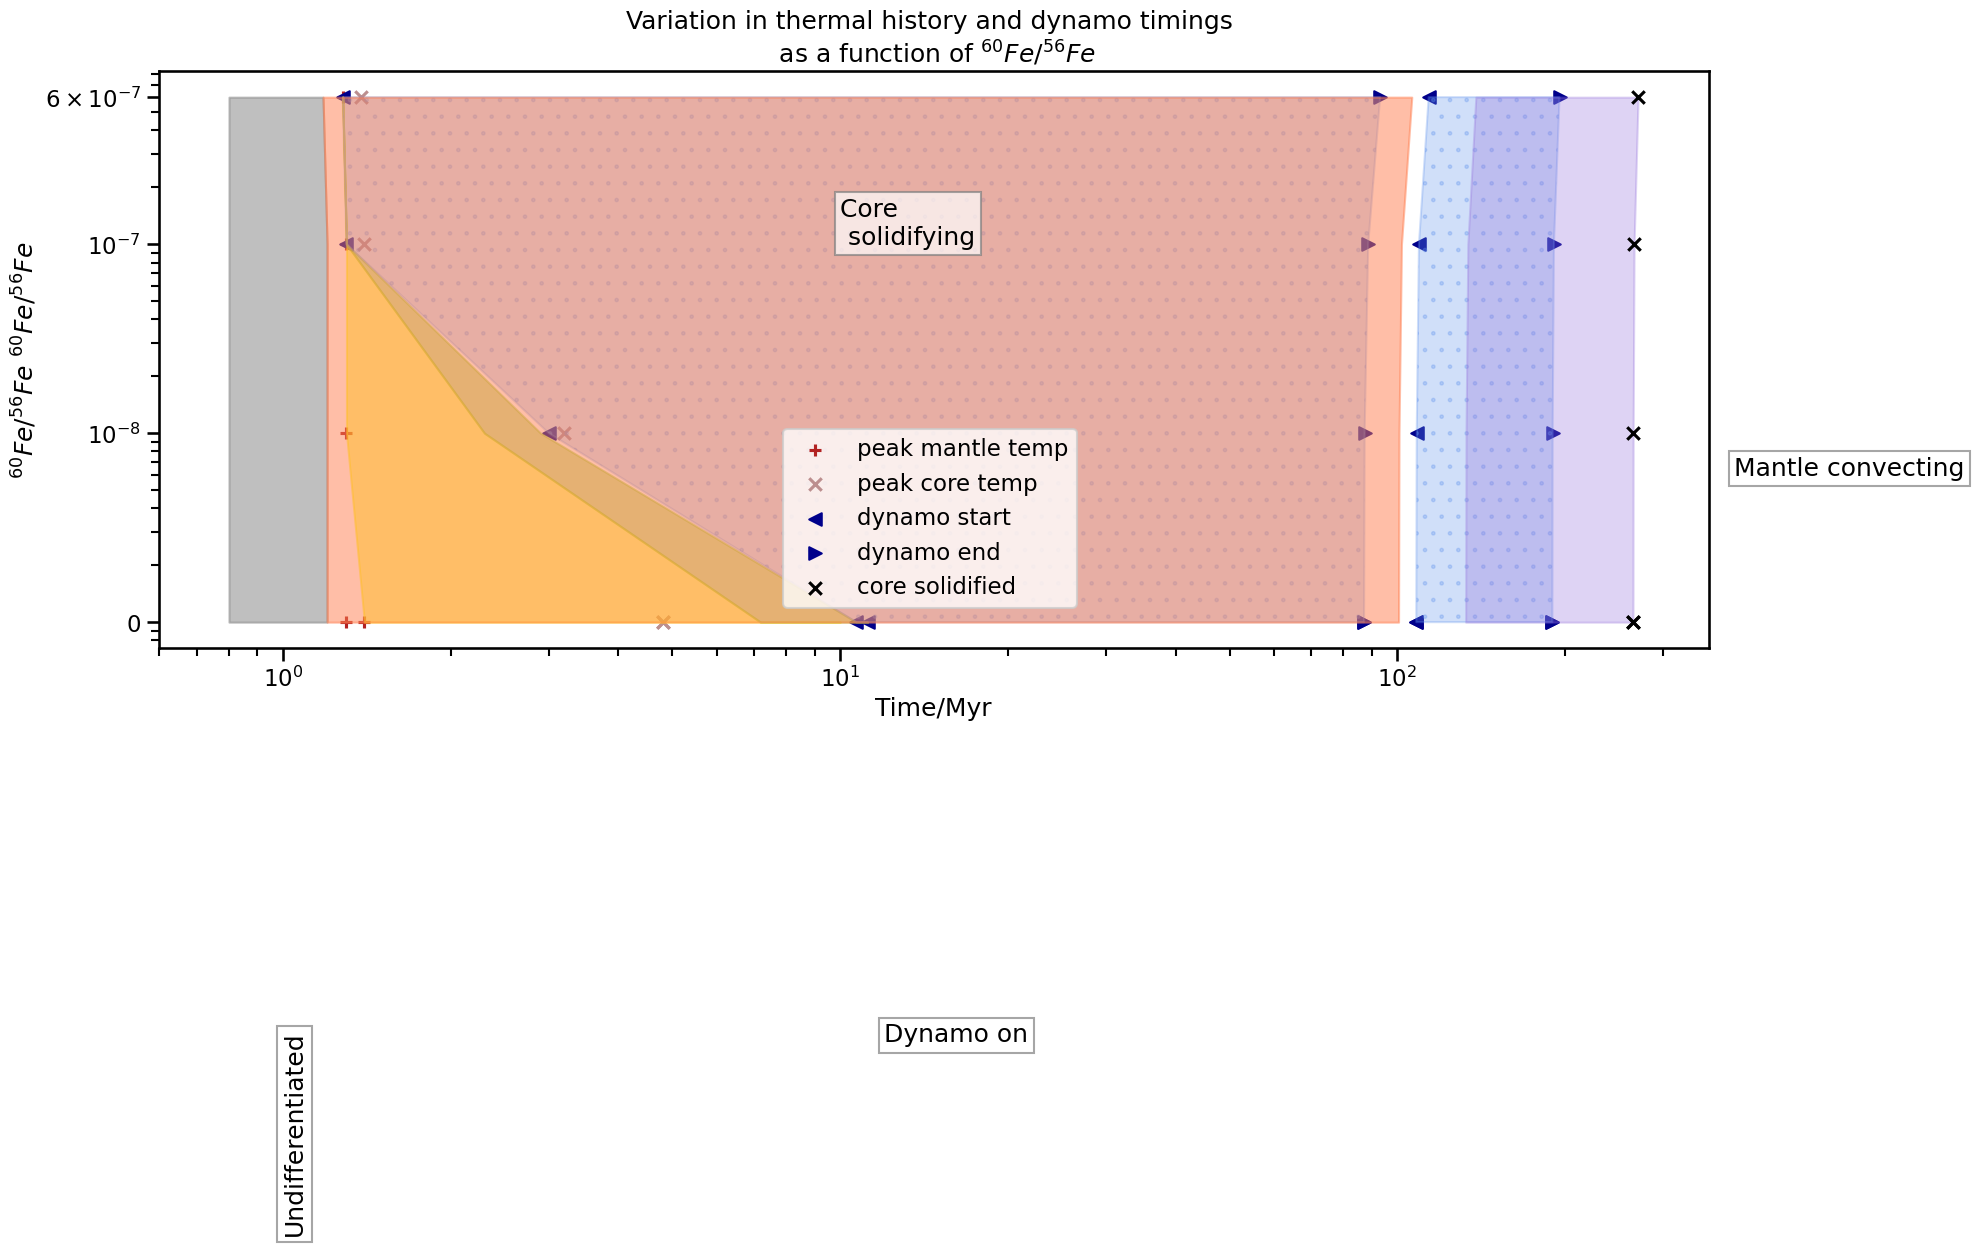

In [191]:
#filter by number of generation periods
#data = data[(data['eta0']>1e11)&(data['eta0']<1e23)]
data.loc[data['Fe0']==0,'Fe0']=1e-9
data['fcond_t']=data['fcond_t'].fillna(data['tsolid']) #if mantle doesnt stop convecting fill until end of thermal evolution
data1 = data[data['Bn1']>1]
data2 = data[data['Bn1']>=1] #only one dynamo generation period
data2.loc[data2['Bn1']>1,'magon_1']=data2.loc[data2['Bn1']>1,'magon_2'] #replace the first generation period with the second so when plot together get continuous
data2.loc[data2['Bn1']>1,'magoff_1']=data2.loc[data2['Bn1']>1,'magoff_2']
with sns.plotting_context('talk'):
    plt.figure(figsize=[20,7.5])
    plt.title(f'Variation in thermal history and dynamo timings \n as a function of {varlab}')
    plt.scatter(data['tmax'],data[var],label='peak mantle temp',marker='+',color='firebrick')
    plt.scatter(data['tcoremax'],data[var],label='peak core temp',marker='x',color='rosybrown')
    plt.scatter(data['magon_1'],data[var],label='dynamo start',marker='<',color='darkblue')
    plt.scatter(data['magoff_1'],data[var],label='dynamo end',marker='>',color='darkblue')
    plt.scatter(data['magon_2'],data[var],marker='<',color='darkblue')
    plt.scatter(data['magoff_2'],data[var],marker='>',color='darkblue')
    plt.fill_betweenx(data[var],0.8,data['diff_time'],color='gray',alpha=0.5)
    plt.fill_betweenx(data[var],data['tstrat_start'],data['tstrat_remove'],color='yellow',alpha=0.5)
    plt.fill_betweenx(data[var],data['tstrat_remove'],data['terode'],color='yellowgreen',alpha=0.5)
    plt.fill_betweenx(data[var],data['magon_1'],data['magoff_1'],color='cornflowerblue',alpha=0.3,hatch='.')
    #plt.fill_betweenx(data[var],data['magon_2'],data['magoff_2'],color='cornflowerblue',alpha=0.3,hatch='.')
    #plt.fill_betweenx(data1[var],data1['magon_1'],data1['magoff_1'],color='cornflowerblue',alpha=0.3,hatch='.')
    plt.fill_betweenx(data1[var],data1['magon_2'],data1['magoff_2'],color='cornflowerblue',alpha=0.3,hatch='.')
    #plt.fill_betweenx(data2[var],data2['magon_1'],data2['magoff_1'],color='cornflowerblue',alpha=0.3,hatch='.')
    plt.fill_betweenx(data[var],data['diff_time'],data['fcond_t'],color='coral',alpha=0.5)
    plt.fill_betweenx(data[var],data['tsolid_start'],data['tsolid'],color='mediumpurple',alpha=0.3)
    plt.scatter(data['tsolid'],data[var],label='core solidified',marker='x',color='black')

    plt.xlabel('Time/Myr')
    plt.xscale('log')
    bcol = 'white' #color for label box
    ecol ='gray' #edgecolor for label box
    aval=0.7 #alpha for label box
    if logvar == True:
        #add text labels
        plt.text(x=1,y=max(data[var])*1e-6,s='Undifferentiated',rotation='vertical',bbox=dict(edgecolor=ecol,facecolor=bcol,alpha=aval))
        plt.text(x=data.loc[2,'fcond_t']*4,y=max(data[var])*1e-2,s='Mantle convecting',bbox=dict(edgecolor=ecol,facecolor=bcol,alpha=aval))
        plt.text(x=data.loc[2,'magon_1']*4,y=max(data[var])*1e-5,s='Dynamo on',bbox=dict(edgecolor=ecol,facecolor=bcol,alpha=aval))
        plt.text(x=10,y=1e-7,s='Core \n solidifying',bbox=dict(edgecolor=ecol,facecolor=bcol,alpha=aval))
        plt.annotate('Erosion of core \n stratification',(data.loc[2,'terode'],max(data[var])*1e-5),(data.loc[2,'terode']+1,max(data[var])*5e-4),arrowprops=dict(facecolor='black',edgecolor='black'),bbox=dict(edgecolor=ecol,facecolor=bcol,alpha=aval))
        plt.yscale('log')
    elif (var == 'Xs_0')|(var=='alpha_n'):
        plt.text(x=1,y=max(data[var])*0.9,s='Undifferentiated',rotation='vertical',bbox=dict(edgecolor=ecol,facecolor=bcol,alpha=aval))
        plt.text(x=data.loc[2,'fcond_t']*0.1,y=max(data[var])*0.9,s='Mantle convecting',bbox=dict(edgecolor=ecol,facecolor=bcol,alpha=aval))
        plt.text(x=data.loc[1,'magon_1'],y=max(data[var])*0.9,s='Dynamo on',bbox=dict(edgecolor=ecol,facecolor=bcol,alpha=aval))
        plt.text(x=data.loc[data[var]==var1,'tsolid_start'],y=min(data[var])*1.1,s='Core \n solidifying',bbox=dict(edgecolor=ecol,facecolor=bcol,alpha=aval))
        plt.annotate('Erosion of core \n stratification',(data.loc[1,'terode'],max(data[var])*0.9),(data.loc[1,'terode']+1,max(data[var])*0.85),arrowprops=dict(facecolor='black',edgecolor='black'),bbox=dict(edgecolor=ecol,facecolor=bcol,alpha=aval))
    else:
        #add text labels
        plt.text(x=1,y=max(data[var]/2),s='Undifferentiated',rotation='vertical',bbox=dict(edgecolor=ecol,facecolor=bcol,alpha=aval))
        plt.text(x=data.loc[1,'fcond_t']*0.3,y=max(data[var])/2,s='Mantle convecting',bbox=dict(edgecolor=ecol,facecolor=bcol,alpha=aval))
        plt.text(x=data.loc[1,'magon_1'],y=max(data[var])/2,s='Dynamo on',bbox=dict(edgecolor=ecol,facecolor=bcol,alpha=aval))
        plt.text(x=100,y=max(data[var])/2,s='Dynamo on',bbox=dict(edgecolor=ecol,facecolor=bcol,alpha=aval))
        plt.text(x=data.loc[data[var]==var1,'tsolid_start'][0],y=min(data[var])*1.2,s='Core \n solidifying',bbox=dict(edgecolor=ecol,facecolor=bcol,alpha=aval))
        plt.annotate('Erosion of core \n thermal stratification',(data.loc[2,'terode'],max(data[var])*0.5),(data.loc[2,'terode']+1,max(data[var])*0.47),arrowprops=dict(facecolor='black',edgecolor='black'),bbox=dict(edgecolor=ecol,facecolor=bcol,alpha=aval))
    plt.ylabel(f'{varlab} {unit}')
    if var == 'Fe0':
        plt.yscale('log')
        plt.yticks(ticks=[1e-9,1e-8,1e-7,6e-7],labels=[0,'$10^{-8}$','$10^{-7}$','$6\\times10^{-7}$'])
    
    plt.legend(bbox_to_anchor=[0.6,0.4])
if save == True:
    plt.savefig(f'../Plots/{folder}all_timings_{var}.png',dpi=450,bbox_inches='tight') 

### Dynamo generation time <a class="anchor" id="dynamo"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

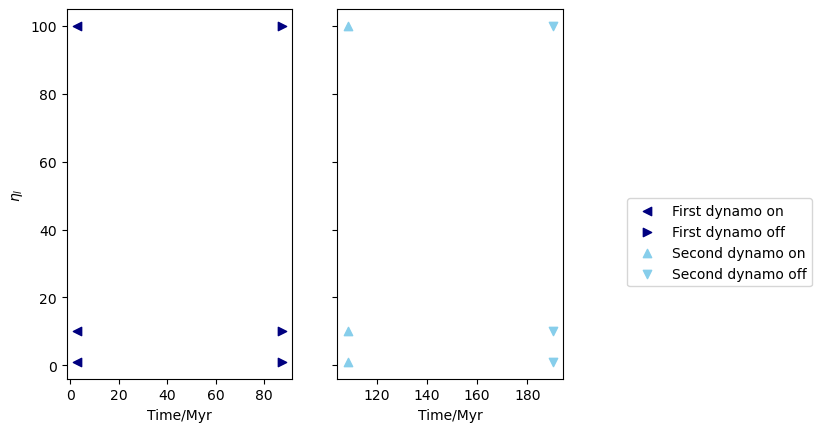

In [163]:
fig, ax = plt.subplots(nrows=1,ncols=2,sharey=True)
ax[0].scatter(data['magon_1'],data[var],label='First dynamo on',marker='<',color='navy')
ax[0].scatter(data['magoff_1'],data[var],label='First dynamo off',marker='>',color='navy')

ax[1].scatter(data['magon_2'],data[var],label='Second dynamo on',marker='^',color='skyblue')
ax[1].scatter(data['magoff_2'],data[var],label='Second dynamo off',marker='v',color='skyblue')

ax[0].set_ylabel(varlab)
ax[0].set_xlabel('Time/Myr')
ax[1].set_xlabel('Time/Myr')
fig.legend(bbox_to_anchor=[1.3,0.5])

#plt.savefig(f'../Plots/{folder}/dynamot_{var}.png')

### Solidification time <a class="anchor" id="solid"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

In [164]:
if var == 'Fe0':
    cmap = plt.colormaps['viridis']
    bounds = [-0.5e-8,0.5e-8,0.5e-7,1.5e-7,1e-6]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    fig = plt.figure()
    plt.scatter(data[var],data['tsolid'],label='Peak mantle temperature',marker='o')
    plt.xlabel(varlab)
    plt.ylabel('Core solidification time /Myr')

    if save == True:
        plt.savefig(f'../Plots/{folder}/solidt_{var}.png',bbox_inches='tight') 

## Stagnant lid thickness <a class="anchor" id="lid"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

(0.0, 1.0)

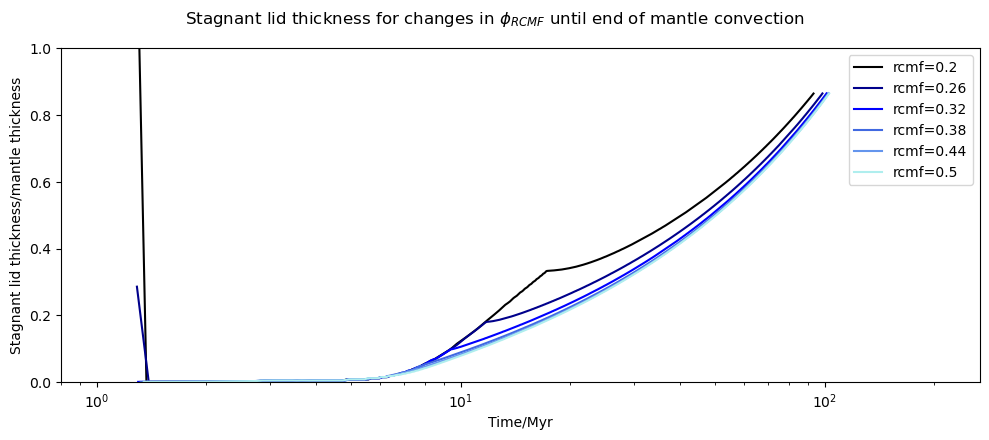

In [54]:
plt.figure(tight_layout=True,figsize=[10,8])
plt.suptitle(f'Stagnant lid thickness for changes in {varlab} until end of mantle convection')
plt.subplot(2,1,1)
for i in range(nrun):
    run = int(minrun+i)
    varval = var_data.loc[var_data['run']==run,var].values[0]
    rmantle = var_data.loc[var_data['run']==run,'r'].values[0]/2
    fcond_t=var_results.loc[var_results['run']==run,'fcond_t'].values[0]
    if var=='r':
        varval = varval/1e3
    #import data
    npzfile = np.load(f'{path}run_{run}.npz')
    t = npzfile['t']/Myr #time in Myr
    d0 = npzfile['d0']
    if fcond_t > 0:
        plt.plot(t[t<=fcond_t],d0[t<=fcond_t]/rmantle,label=f'{var}={varval:.2g}',color=colors[i])
    else:
        plt.plot(t,d0/rmantle,label=f'{var}={varval:.2g}',color=colors[i])
plt.xlabel('Time/Myr')
plt.ylabel('Stagnant lid thickness/mantle thickness')
plt.legend()
plt.xscale('log')
plt.xlim([0.8,tend])
plt.ylim([0,1])
#if save == True:
 #   plt.savefig(f'../Plots/{folder}d0_{var}.png',dpi=450,bbox_inches='tight')

## $\eta_0$ investigation plots

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=1,tight_layout=True,figsize=[10,8])
plt.suptitle(f'Stagnant lid thickness for changes in {varlab} until end of mantle convection')
ax1 = ax.twinx()
run = int(minrun)
varval = var_data.loc[var_data['run']==run,var].values[0]
fcond_t=var_results.loc[var_results['run']==run,'fcond_t'].values[0]

#import data
npzfile = np.load(f'{path}run_{run}.npz')
t = npzfile['t']/Myr #time in Myr
d0 = npzfile['d0']
Fs = npzfile['Flux'][0,:]
Flid = npzfile['Flux'][4,:]
ax.scatter(t,np.round(d0/500),label=f'$\\eta_0$={varval:.0e} Pas',color='navy')
ax1.plot(t,Fs,linestyle='dashed',color='navy',label='$F_S$')
ax1.plot(t,Flid,linestyle='dotted',color='navy',label='$F_{lid}$')
#max val
run = int(minrun+nrun-1)
varval = var_data.loc[var_data['run']==run,var].values[0]
fcond_t=var_results.loc[var_results['run']==run,'fcond_t'].values[0]
    
#import data
npzfile = np.load(f'{path}run_{run}.npz')
t = npzfile['t']/Myr #time in Myr
d0 = npzfile['d0']
Fs = npzfile['Flux'][0,:]
ax.scatter(t[t<=fcond_t],np.round(d0[t<=fcond_t]/500),label=f'$\\eta_0$={varval:.0e} Pas',color='maroon')
ax1.plot(t,Fs,linestyle='dashed',color='maroon')
ax1.set_ylabel('$F_S$/W$m^{-2}$')
ax.set_xlabel('Time/Myr')
ax.set_ylabel('Stagnant lid thickness/cell thickness')
ax.legend()
ax1.legend(loc='lower right')
ax.set_xlim([0,10])
ax.set_ylim([0,10])
#plt.savefig(f'../Plots/{folder}d0zoom_{var}.png',dpi=450,bbox_inches='tight')

### CMB boundary layer thickness and CMB flux

(0.0, 0.2)

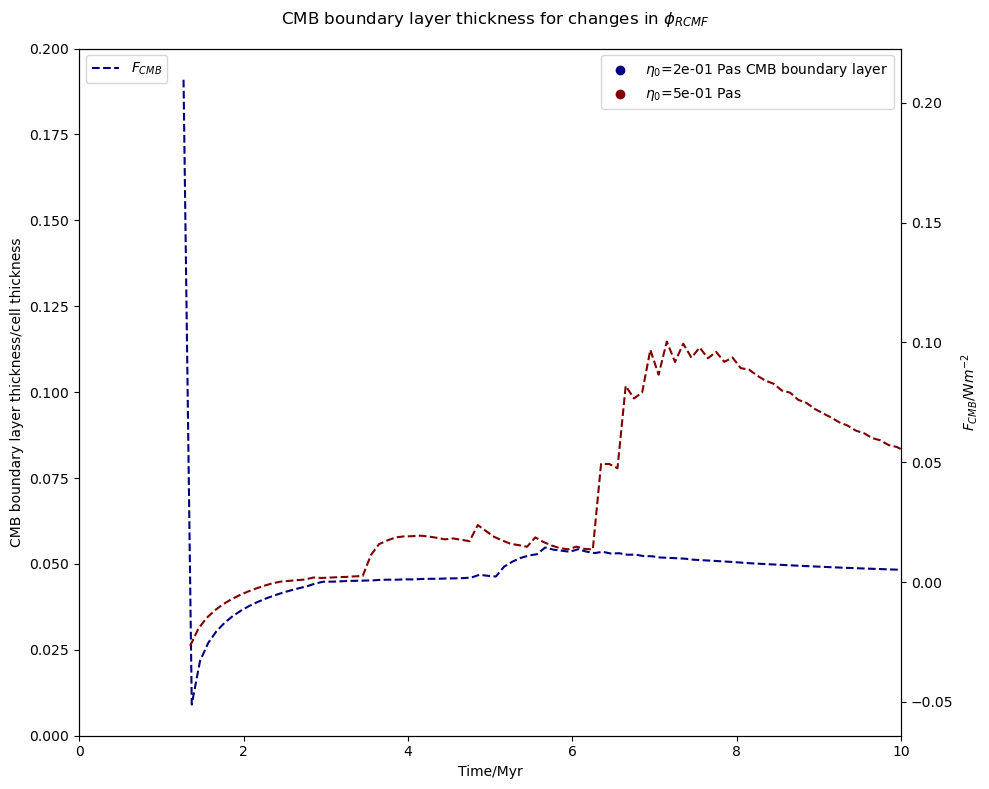

In [55]:
fig, ax = plt.subplots(nrows=1,ncols=1,tight_layout=True,figsize=[10,8])
plt.suptitle(f'CMB boundary layer thickness for changes in {varlab}')
ax1 = ax.twinx()
run = int(minrun)
varval = var_data.loc[var_data['run']==run,var].values[0]
fcond_t=var_results.loc[var_results['run']==run,'fcond_t'].values[0]

#import data
npzfile = np.load(f'{path}run_{run}.npz')
t = npzfile['t']/Myr #time in Myr
dl = npzfile['dl']
Fs = npzfile['Flux'][1,:] #fcmb
ax.scatter(t,dl/500,label=f'$\\eta_0$={varval:.0e} Pas CMB boundary layer',color='navy')
ax1.plot(t,Fs,linestyle='dashed',color='navy',label='$F_{CMB}$')

#max val
run = int(minrun+nrun-1)
varval = var_data.loc[var_data['run']==run,var].values[0]
fcond_t=var_results.loc[var_results['run']==run,'fcond_t'].values[0]
    
#import data
npzfile = np.load(f'{path}run_{run}.npz')
t = npzfile['t']/Myr #time in Myr
dl = npzfile['dl']
Fs = npzfile['Flux'][1,:]
ax.scatter(t[t<=fcond_t],dl[t<=fcond_t]/500,label=f'$\\eta_0$={varval:.0e} Pas',color='maroon')
ax1.plot(t,Fs,linestyle='dashed',color='maroon')
ax1.set_ylabel('$F_{CMB}$/W$m^{-2}$')
ax.set_xlabel('Time/Myr')
ax.set_ylabel('CMB boundary layer thickness/cell thickness')
ax.legend()
ax1.legend(loc='upper left')
ax.set_xlim([0,10])
ax.set_ylim([0,0.2])
#plt.savefig(f'../Plots/{folder}{var}_dl.png',dpi=450,bbox_inches='tight')

(0.0, 10.0)

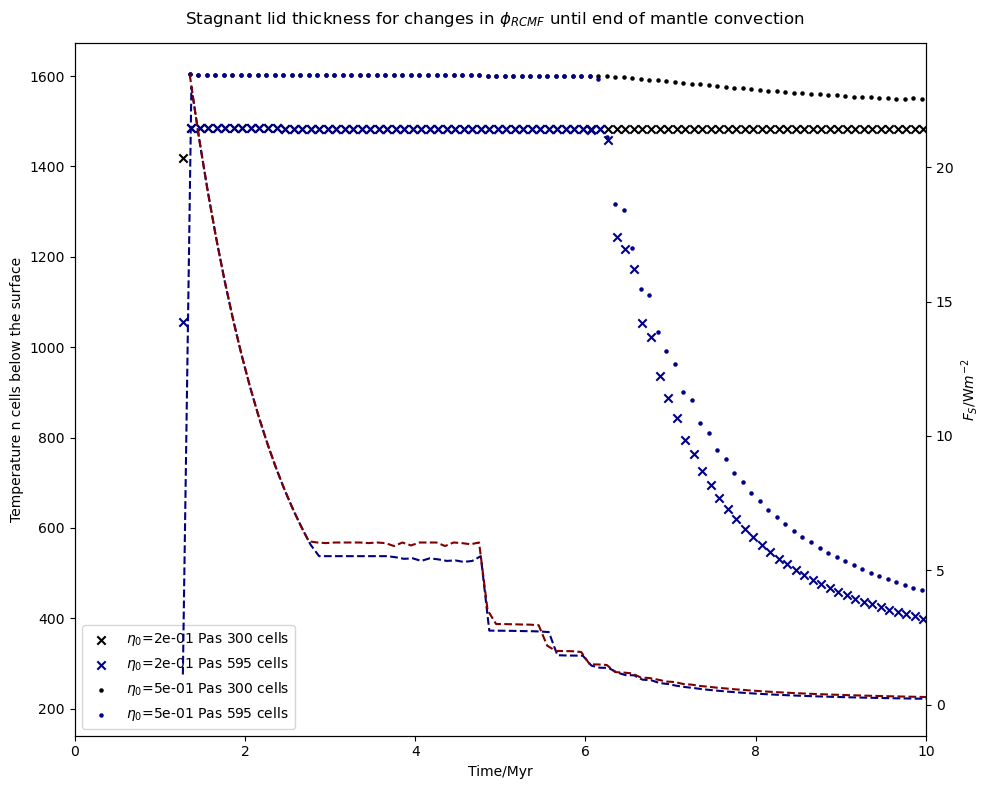

In [56]:
n=295
fig, ax = plt.subplots(nrows=1,ncols=1,tight_layout=True,figsize=[10,8])
plt.suptitle(f'Stagnant lid thickness for changes in {varlab} until end of mantle convection')
ax1 = ax.twinx()
run = int(minrun)
varval = var_data.loc[var_data['run']==run,var].values[0]
fcond_t=var_results.loc[var_results['run']==run,'fcond_t'].values[0]

#import data
npzfile = np.load(f'{path}run_{run}.npz')
t = npzfile['t']/Myr #time in Myr
Ts = npzfile['T_profile']
Fs = npzfile['Flux'][0,:]
for i in range(2):
    ax.scatter(t,Ts[:,(n*i+301)],label=f'$\\eta_0$={varval:.0e} Pas {n*i+300} cells',color=colors[i],marker='x')
ax1.plot(t,Fs,linestyle='dashed',color='navy')

#max val
run = int(minrun+nrun-1)
varval = var_data.loc[var_data['run']==run,var].values[0]
fcond_t=var_results.loc[var_results['run']==run,'fcond_t'].values[0]
    
#import data
npzfile = np.load(f'{path}run_{run}.npz')
t = npzfile['t']/Myr #time in Myr
Ts = npzfile['T_profile']
Fs = npzfile['Flux'][0,:]
for i in range(2):
    ax.scatter(t[t<=fcond_t],Ts[t<=fcond_t][:,(n*i+301)],label=f'$\\eta_0$={varval:.0e} Pas {n*i+300} cells',color=colors[i],s=5,)
ax1.plot(t,Fs,linestyle='dashed',color='maroon')
ax1.set_ylabel('$F_S$/W$m^{-2}$')
ax.set_xlabel('Time/Myr')
ax.set_ylabel('Temperature n cells below the surface')
ax.legend()
ax.set_xlim([0,10])
#plt.savefig(f'../Plots/{folder}d0zoom_{var}.png',dpi=450,bbox_inches='tight')

### Integrated surface flux

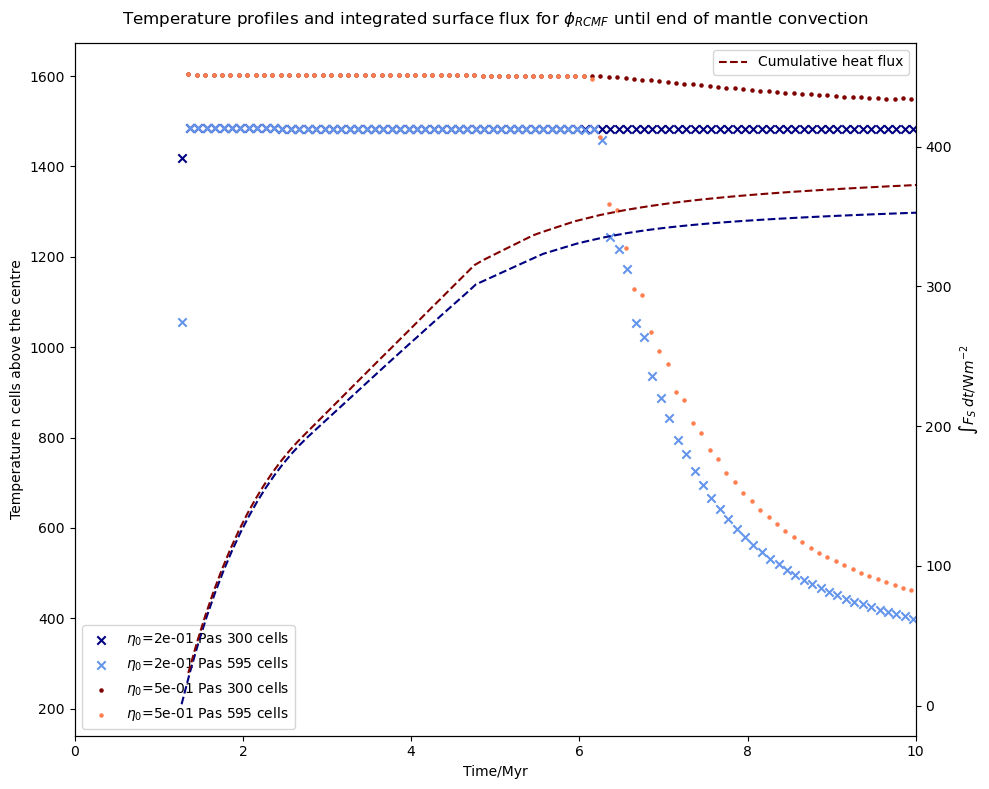

In [57]:
#plot of integrated surface flux
fig, ax = plt.subplots(nrows=1,ncols=1,tight_layout=True,figsize=[10,8])
plt.suptitle(f'Temperature profiles and integrated surface flux for {varlab} until end of mantle convection')
ax1 = ax.twinx()
run = int(minrun)
varval = var_data.loc[var_data['run']==run,var].values[0]
fcond_t=var_results.loc[var_results['run']==run,'fcond_t'].values[0]

#import data
npzfile = np.load(f'{path}run_{run}.npz')
t = npzfile['t']/Myr #time in Myr
Ts = npzfile['T_profile']
Fs = npzfile['Flux'][0,:]
colors=['navy','cornflowerblue']
for i in range(2):
    ax.scatter(t,Ts[:,(n*i+301)],label=f'$\\eta_0$={varval:.0e} Pas {n*i+300} cells',color=colors[i],marker='x')
ax1.plot(t,np.cumsum(Fs),linestyle='dashed',color='navy')

#max val
run = int(minrun+nrun-1)
varval = var_data.loc[var_data['run']==run,var].values[0]
fcond_t=var_results.loc[var_results['run']==run,'fcond_t'].values[0]
    
#import data
npzfile = np.load(f'{path}run_{run}.npz')
t = npzfile['t']/Myr #time in Myr
Ts = npzfile['T_profile']
Fs = npzfile['Flux'][0,:]
colors=['maroon','coral']
for i in range(2):
    ax.scatter(t[t<=fcond_t],Ts[t<=fcond_t][:,(n*i+301)],label=f'$\\eta_0$={varval:.0e} Pas {n*i+300} cells',color=colors[i],s=5,)
ax1.plot(t,np.cumsum(Fs),linestyle='dashed',color='maroon',label='Cumulative heat flux')
ax1.set_ylabel('$\\int F_S \;dt$/W$m^{-2}$')
ax.set_xlabel('Time/Myr')
ax.set_ylabel('Temperature n cells above the centre')
ax.legend()
ax1.legend()
ax.set_xlim([0,10])
if save == True:
    plt.savefig(f'../Plots/{folder}{var}_dlT.png',dpi=450,bbox_inches='tight')